In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
from keras.layers import Dropout
from nltk.tokenize import TweetTokenizer

# the follwing step are taken in the this file
###### read the data and cleaning the data 
###### dividing the dataset in ot test and train
###### making the sequences on test and train dataset
###### making the padding on train test sequences
###### preparing the vocabularly size and differnt thing for the Glove Embedding 

###### using the Glove Embedding making the embedding matrix by using our tokenizer object

###### train the embedding matrix on RNN and saving the weights 
###### Drawing the graph between the RNN Model lossess and accuracy

###### train the embedding matrix on LSTM and saving the weights
###### Drawing the graph between the LSTM Model lossess and accuracy

###### test RNN model on test dataset and the print the classification report and confussion matrix 

###### test LSTM model on test dataset and the print the classification report and confussion matrix 

###### also testing the both model on the our dataset

In [2]:
df=pd.read_excel('F:/Data/Full Stack Data Scientist Bootcamp/NLP/TweetSentiment.xlsx')
df

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
101154,4,@jessikasay congrats on the followers
101155,4,@dannywood As in &quot;back dat ass on up in h...
101156,4,School In about 12 minutes then I get picked u...
101157,4,@itsMeeeech -- sounds fun!


# Text Preprocesing  

In [3]:
df["tweet"] = df["tweet"].astype(str)


## Lower Casing

In [4]:
df["processed_tweets"] = df["tweet"].str.lower()
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [5]:
print("\nOriginal Tweet:",df['tweet'][0])
print(df['processed_tweets'][0])



Original Tweet: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d


In [6]:
len(df['processed_tweets'])

101159

## Removal of @ and User names

In [7]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(df['processed_tweets'])):
    result = tknzr.tokenize(df['processed_tweets'][a])
    res=" ".join(result)
    df['processed_tweets'][a]=res
print("\nTokenize a twitter text:")
print(df['processed_tweets'])


C:\Users\ASIM COMPUTERS\AppData\Local\Temp\ipykernel_8876\2688761239.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tweets'][a]=res



Tokenize a twitter text:
0         http://twitpic.com/2y1zl - awww , that's a bum...
1         is upset that he can't update his facebook by ...
2         i dived many times for the ball . managed to s...
3            my whole body feels itchy and like its on fire
4         no , it's not behaving at all . i'm mad . why ...
                                ...                        
101154                            congrats on the followers
101155    as in " back dat ass on up in here for some fu...
101156    school in about 12 minutes then i get picked u...
101157                                     - - sounds fun !
101158    good morning everyone welcome to my new follow...
Name: processed_tweets, Length: 101159, dtype: object


## Remove Punctuations

In [8]:
# drop the new column created in last cell

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["processed_tweets"] = df["processed_tweets"].apply(lambda text: remove_punctuation(text))
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",httptwitpiccom2y1zl awww thats a bummer you...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


## Remove URLs

In [9]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

# def remove_urls(text):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     return url_pattern.sub(r'', text)

In [10]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(df['processed_tweets'])):
    result = remove_URL(df['processed_tweets'][a])
    df['processed_tweets'][a]=result
print("No URLs:")
print(result)


C:\Users\ASIM COMPUTERS\AppData\Local\Temp\ipykernel_8876\2199000140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tweets'][a]=result


No URLs:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [11]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


## Remove Emojis

In [12]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")

'game is on '

In [13]:
for a in range(len(df['processed_tweets'])):
    result = remove_emoji(df['processed_tweets'][a])
    df['processed_tweets'][a]=result
  

C:\Users\ASIM COMPUTERS\AppData\Local\Temp\ipykernel_8876\1157182765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tweets'][a]=result


In [14]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


## Removal of Emoticons

In [15]:
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [16]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

'Hello '

In [17]:
for a in range(len(df['processed_tweets'])):
    result = remove_emoticons(df['processed_tweets'][a])
    df['processed_tweets'][a]=result

print("No Emoticons:")
print(result)

C:\Users\ASIM COMPUTERS\AppData\Local\Temp\ipykernel_8876\3013409921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tweets'][a]=result


No Emoticons:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [18]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


In [19]:
df.isna().sum()

target              0
tweet               0
processed_tweets    0
dtype: int64

## Labelling the target fileds

In [20]:
df['target'].value_counts()

4    51150
0    50009
Name: target, dtype: int64

In [21]:
df['Target']=df['target'].replace(4,1)
df['Target'].value_counts()

1    51150
0    50009
Name: Target, dtype: int64

In [22]:
import os
import re

import numpy as np
import tensorflow as tf

# np.random.seed(1)
# tf.set_random_seed(2)

import pandas as pd
import keras
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, log_loss

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Stop words

In [23]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [24]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


 #apply function   
df['processed_tweets'] = df['processed_tweets'].apply(lambda text: cleaning_stopwords(text))
df['processed_tweets'].head()

0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                 no not behaving im mad cant see over
Name: processed_tweets, dtype: object

In [25]:
dataset = df.drop('tweet',axis=1)
dataset

,target,processed_tweets,Target
0,0,awww thats bummer shoulda got david carr third...,0
1,0,upset cant update facebook texting might cry r...,0
2,0,dived many times ball managed save 50 rest go ...,0
3,0,whole body feels itchy like fire,0
4,0,no not behaving im mad cant see over,0
...,...,...,...
101154,4,congrats followers,1
101155,4,back dat ass full service,1
101156,4,school 12 minutes get picked morgan,1
101157,4,sounds fun,1


## Stemming

In [26]:
# import nltk
# st = nltk.PorterStemmer()
# def stemming_on_text(data):
#     text = [st.stem(word) for word in data]
#     return data
# df['processed_tweets']= df['processed_tweets'].apply(lambda x: stemming_on_text(x))
# df['processed_tweets'].head()

## Lammentization

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10053] An
[nltk_data]     established connection was aborted by the software in
[nltk_data]     your host machine>


False

In [28]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

In [29]:
df['processed_tweets'] = df['processed_tweets'].apply(lemmatizer_on_text)
df['processed_tweets'].head()

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\ASIM COMPUTERS/nltk_data'
    - 'C:\\Users\\ASIM COMPUTERS\\anaconda3\\nltk_data'
    - 'C:\\Users\\ASIM COMPUTERS\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\ASIM COMPUTERS\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ASIM COMPUTERS\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [30]:
X = df['processed_tweets']
y = df['Target']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y,random_state = 42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(91043,)
(10116,)


In [32]:
print(y_train.shape)
print(y_test.shape)

(91043,)
(10116,)


In [33]:
X_test

10538                                     ummmm wanna come
89283    lol aww celebrate earlier get loads complitmen...
40354             downloading 22nd episode heroes season 3
11834                                 going sleep im tired
585      cant set feet ground missing eyelid people mig...
                               ...                        
77266         oop hick ups oop nope awwwww wanted hick ups
51995    back 2 mile walk woobie doggie yet another stu...
22770              noooooo boo computer problems empathise
61798    hrm guess hit sack work 6 hours 9 hours later ...
36296                home justins farewell dinner dont die
Name: processed_tweets, Length: 10116, dtype: object

## Text Sequencing

In [34]:

# tokenize and sequence sentences
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(lower=False)

tokenizer.fit_on_texts(X_train)
train_text_vec = tokenizer.texts_to_sequences(X_train)

tokenizer.fit_on_texts(X_test)
test_text_vec = tokenizer.texts_to_sequences(X_test)

In [35]:
train_text_vec

[[104, 22, 621, 3425, 1148, 2, 107, 14, 1444, 3307, 1819, 30, 199, 183, 581],
 [507, 598, 978, 82, 2661, 3004, 70, 121],
 [1066, 179],
 [14852, 210, 1, 2662, 926],
 [4, 24],
 [4, 24, 1626, 284, 7748, 11846, 2, 46, 104, 45, 6, 1842],
 [965, 5954, 375, 4872, 759, 1, 4],
 [23, 17, 273, 25, 21422, 525, 8695, 725],
 [487, 435, 10036, 279, 14, 862, 10037, 37, 61, 17],
 [1047, 555, 53, 79, 187],
 [1032, 484, 115, 2181, 1329, 7008, 6409, 8696, 5, 61],
 [10, 2, 1, 12, 1297, 12, 3674, 11847, 466, 725, 21423, 21424, 2910, 1875],
 [298, 536, 2270, 98, 75],
 [18, 4387, 21425, 125, 5, 63],
 [16, 146, 25, 1787, 21, 3, 106, 202, 3192, 8, 4873],
 [24, 207, 43, 39, 70, 11848],
 [188, 247],
 [389, 4204, 4874, 161, 5, 5546, 1067, 141, 753, 42],
 [1758, 292, 12, 5955, 1008, 328, 27, 5955, 476, 536, 21426, 200],
 [1,
  1445,
  209,
  1491,
  262,
  102,
  5,
  3,
  599,
  27,
  22,
  381,
  43,
  38,
  244,
  38,
  27,
  88],
 [255, 3843, 53, 169],
 [2663, 241, 1788, 21427, 187, 2579, 1330, 241, 1404, 219, 

In [36]:
test_text_vec

[[7002, 108, 68],
 [20, 307, 1608, 735, 6, 991, 52122, 308, 586, 852],
 [1728, 5511, 713, 2173, 517, 53],
 [12, 44, 1, 90],
 [15, 464, 848, 2085, 238, 15458, 75, 218, 6],
 [76, 99, 95, 264, 635, 9, 301, 10, 43, 5, 43, 758, 63, 16, 395, 1380, 53, 8],
 [33, 128, 23, 147, 252, 52123, 665, 95],
 [56, 103, 7, 8, 35, 23, 274, 301, 1304, 574, 194],
 [1008, 49, 12, 37, 70, 233, 4892, 182, 86, 311],
 [2860, 75, 142, 1547, 1611],
 [23, 133, 813, 1, 96, 1868, 816, 63, 6018, 658, 7496, 22710, 10076, 11, 4362],
 [364, 381, 34, 11, 142, 8, 5],
 [20, 13956, 503, 30, 1978, 9745],
 [68, 1639, 52124, 949, 79, 714],
 [106, 4, 3855, 21743, 19, 202, 1095, 2707, 180, 284, 72],
 [2548,
  226,
  8539,
  11,
  3229,
  2045,
  244,
  98,
  449,
  1,
  441,
  1440,
  3,
  13015,
  118,
  940],
 [10706, 2828, 48],
 [35, 227, 52125, 648, 215, 7, 2428, 325, 154, 99, 101, 648, 52126],
 [102, 1331, 246],
 [4, 267],
 [10, 187, 107],
 [985, 807, 639, 4, 125, 5002, 511, 579],
 [1173, 4731, 4410, 2717, 227, 2458, 916, 12

In [37]:
print('Maximum tweet length: {}'.format(
len((max((train_text_vec + test_text_vec), key=len)))))

Maximum tweet length: 57


In [38]:
#checking the next maximum number
lenght = []
for i in (train_text_vec + test_text_vec):
    if  10<len(i)<28:
        lenght.append(len(i))
max(lenght)

27

We can leave the maximum word length to 28

In [39]:
# train['processed_tweets'].apply(lambda x : len(x.split(' '))).quantile(0.95)

In [40]:
# pad the sequences
from keras.preprocessing import sequence
max_words = 28
X_train = sequence.pad_sequences(train_text_vec, maxlen=max_words)
X_test = sequence.pad_sequences(test_text_vec, maxlen=max_words)
# modelCNN = None
modelRNN=None
modelLSTM=None
print ("After Padding X[train[0]=\n", X_test[0])

After Padding X[train[0]=
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 7002  108   68]


## End of Data Preprocessing



In [41]:
X_train.shape, X_train,y_train.shape,y_train

((91043, 28),
 array([[   0,    0,    0, ...,  199,  183,  581],
        [   0,    0,    0, ..., 3004,   70,  121],
        [   0,    0,    0, ...,    0, 1066,  179],
        ...,
        [   0,    0,    0, ...,    3,    4,  896],
        [   0,    0,    0, ...,    9,   44,  336],
        [   0,    0,    0, ...,  648,   15, 2221]]),
 (91043,),
 66936    0
 5326     0
 75383    0
 59194    1
 84844    1
         ..
 6265     0
 54886    1
 76820    0
 860      0
 15795    0
 Name: Target, Length: 91043, dtype: int64)

In [42]:
X_test.shape, X_test,   y_test.shape,  y_test

((10116, 28),
 array([[    0,     0,     0, ...,  7002,   108,    68],
        [    0,     0,     0, ...,   308,   586,   852],
        [    0,     0,     0, ...,  2173,   517,    53],
        ...,
        [    0,     0,     0, ...,   416,   966, 55313],
        [    0,     0,     0, ..., 12656,   112,   544],
        [    0,     0,     0, ...,   284,    14,   821]]),
 (10116,),
 10538    0
 89283    1
 40354    1
 11834    0
 585      0
         ..
 77266    0
 51995    1
 22770    0
 61798    0
 36296    1
 Name: Target, Length: 10116, dtype: int64)

# Modelling

In [43]:
tokenizer.word_index

{'im': 1,
 'but': 2,
 'not': 3,
 'good': 4,
 'day': 5,
 'get': 6,
 'go': 7,
 'work': 8,
 'like': 9,
 'no': 10,
 'today': 11,
 'going': 12,
 'back': 13,
 'dont': 14,
 'cant': 15,
 'got': 16,
 'time': 17,
 'love': 18,
 'one': 19,
 'lol': 20,
 'really': 21,
 'know': 22,
 'well': 23,
 'night': 24,
 'morning': 25,
 'u': 26,
 'still': 27,
 'see': 28,
 'new': 29,
 'want': 30,
 'think': 31,
 'twitter': 32,
 'thanks': 33,
 'home': 34,
 'oh': 35,
 'off': 36,
 'much': 37,
 'great': 38,
 '2': 39,
 'need': 40,
 'last': 41,
 'hope': 42,
 'tomorrow': 43,
 'sleep': 44,
 'ill': 45,
 'thats': 46,
 'fun': 47,
 'nice': 48,
 'would': 49,
 'miss': 50,
 'wish': 51,
 'school': 52,
 '3': 53,
 'feel': 54,
 'haha': 55,
 'getting': 56,
 'right': 57,
 'didnt': 58,
 'bed': 59,
 'bad': 60,
 'sad': 61,
 'happy': 62,
 'ive': 63,
 'though': 64,
 'way': 65,
 'over': 66,
 'sorry': 67,
 'come': 68,
 'make': 69,
 'better': 70,
 'week': 71,
 'tonight': 72,
 'could': 73,
 'watching': 74,
 'people': 75,
 'gonna': 76,
 'yeah':

In [44]:
tokenizer.index_word

{1: 'im',
 2: 'but',
 3: 'not',
 4: 'good',
 5: 'day',
 6: 'get',
 7: 'go',
 8: 'work',
 9: 'like',
 10: 'no',
 11: 'today',
 12: 'going',
 13: 'back',
 14: 'dont',
 15: 'cant',
 16: 'got',
 17: 'time',
 18: 'love',
 19: 'one',
 20: 'lol',
 21: 'really',
 22: 'know',
 23: 'well',
 24: 'night',
 25: 'morning',
 26: 'u',
 27: 'still',
 28: 'see',
 29: 'new',
 30: 'want',
 31: 'think',
 32: 'twitter',
 33: 'thanks',
 34: 'home',
 35: 'oh',
 36: 'off',
 37: 'much',
 38: 'great',
 39: '2',
 40: 'need',
 41: 'last',
 42: 'hope',
 43: 'tomorrow',
 44: 'sleep',
 45: 'ill',
 46: 'thats',
 47: 'fun',
 48: 'nice',
 49: 'would',
 50: 'miss',
 51: 'wish',
 52: 'school',
 53: '3',
 54: 'feel',
 55: 'haha',
 56: 'getting',
 57: 'right',
 58: 'didnt',
 59: 'bed',
 60: 'bad',
 61: 'sad',
 62: 'happy',
 63: 'ive',
 64: 'though',
 65: 'way',
 66: 'over',
 67: 'sorry',
 68: 'come',
 69: 'make',
 70: 'better',
 71: 'week',
 72: 'tonight',
 73: 'could',
 74: 'watching',
 75: 'people',
 76: 'gonna',
 77: 'ye

In [45]:
tokenizer.index_docs

defaultdict(int,
            {107: 885,
             3307: 23,
             1444: 68,
             30: 2516,
             581: 200,
             1819: 51,
             1148: 88,
             2: 8219,
             199: 602,
             14: 3997,
             22: 2909,
             621: 187,
             183: 636,
             104: 970,
             3425: 23,
             598: 200,
             2661: 32,
             82: 1190,
             978: 110,
             507: 229,
             3004: 27,
             121: 901,
             70: 1423,
             1066: 95,
             179: 644,
             926: 116,
             210: 574,
             1: 9974,
             2662: 29,
             14852: 2,
             4: 5726,
             24: 2720,
             284: 441,
             45: 1862,
             1626: 58,
             1842: 50,
             6: 4929,
             46: 1871,
             7748: 7,
             11846: 4,
             375: 326,
             4872: 14,
             965: 111,

In [46]:
tokenizer.word_counts

OrderedDict([('ok', 990),
             ('know', 3006),
             ('myspace', 189),
             ('effin', 20),
             ('gay', 91),
             ('but', 8394),
             ('please', 955),
             ('dont', 4144),
             ('crash', 63),
             ('browser', 25),
             ('everytime', 47),
             ('want', 2605),
             ('hear', 619),
             ('music', 648),
             ('fail', 206),
             ('tuesday', 234),
             ('gorgeous', 204),
             ('hasnt', 113),
             ('even', 1204),
             ('reached', 31),
             ('mid', 26),
             ('week', 1426),
             ('yet', 895),
             ('freaking', 100),
             ('hot', 631),
             ('rootbeer', 2),
             ('sucks', 598),
             ('im', 10771),
             ('hardcore', 31),
             ('blah', 110),
             ('good', 5990),
             ('morning', 2840),
             ('fellow', 55),
             ('tweets', 440),
           

In [47]:
tokenizer.filters

'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

In [48]:
tokenizer.oov_token

In [49]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 55313 unique tokens.


In [50]:
len((train_text_vec + test_text_vec))*2

202318

In [51]:

vocabulary_size = len((train_text_vec + test_text_vec))*2
vocabulary_size

202318

## Glove Embeddings

In [52]:
embeddings_index = {}
with open('F:/Data/Full Stack Data Scientist Bootcamp/NLP/archive/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [53]:
len(values),values[0],values

(101,
 'sandberger',
 ['sandberger',
  '0.28365',
  '-0.6263',
  '-0.44351',
  '0.2177',
  '-0.087421',
  '-0.17062',
  '0.29266',
  '-0.024899',
  '0.26414',
  '-0.17023',
  '0.25817',
  '0.097484',
  '-0.33103',
  '-0.43859',
  '0.0095799',
  '0.095624',
  '-0.17777',
  '0.38886',
  '0.27151',
  '0.14742',
  '-0.43973',
  '-0.26588',
  '-0.024271',
  '0.27186',
  '-0.36761',
  '-0.24827',
  '-0.20815',
  '0.22128',
  '-0.044409',
  '0.021373',
  '0.24594',
  '0.26143',
  '0.29303',
  '0.13281',
  '0.082232',
  '-0.12869',
  '0.1622',
  '-0.22567',
  '-0.060348',
  '0.28703',
  '0.11381',
  '0.34839',
  '0.3419',
  '0.36996',
  '-0.13592',
  '0.0062694',
  '0.080317',
  '0.0036251',
  '0.43093',
  '0.01882',
  '0.31008',
  '0.16722',
  '0.074112',
  '-0.37745',
  '0.47363',
  '0.41284',
  '0.24471',
  '0.075965',
  '-0.51725',
  '-0.49481',
  '0.526',
  '-0.074645',
  '0.41434',
  '-0.1956',
  '-0.16544',
  '-0.045649',
  '-0.40153',
  '-0.13136',
  '-0.4672',
  '0.18825',
  '0.2612',

In [54]:
embeddings_index

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [55]:
# embedding_matrix = np.zeros((vocab_size,300))
# for word,i in tqdm(token.word_index.items()):
#     embedding_value = embedding_vector.get(word)
#     if embedding_value is not None:
#         embedding_matrix[i] = embedding_value

In [61]:
embeddings_index.get('talha')

array([ 0.33799  ,  0.48214  , -0.37856  , -0.24756  , -0.0072556,
       -0.61161  , -0.068295 , -0.66211  ,  0.18202  ,  0.50374  ,
        0.41075  ,  0.072985 ,  0.069706 , -0.55348  ,  0.97936  ,
        0.32693  , -0.065899 , -1.1591   ,  0.43176  ,  0.37203  ,
        0.70858  , -0.40322  , -0.0056294,  0.052656 , -0.46647  ,
        0.37903  , -0.21073  ,  0.27505  , -0.32645  ,  1.2382   ,
       -0.57502  , -0.69695  ,  0.27042  ,  1.1429   ,  0.43065  ,
        0.54025  , -0.51125  ,  0.51721  , -0.28948  ,  0.39734  ,
       -0.083211 , -0.095001 ,  0.75239  , -0.072263 , -0.65504  ,
       -0.37811  ,  0.58336  ,  0.73584  ,  0.39069  ,  0.29873  ,
       -0.38236  ,  0.62731  , -0.33027  ,  0.2502   , -0.40076  ,
        1.3777   , -0.48849  ,  0.25236  , -0.31394  ,  0.33853  ,
       -0.40411  , -0.14074  ,  0.50974  , -0.064895 ,  0.0819   ,
       -0.46674  ,  0.23188  , -0.40688  ,  0.085079 ,  0.11777  ,
       -0.13551  , -0.14155  , -0.18664  , -0.31327  , -0.0103

In [62]:
#embedding matrix
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, i in word_index.items():
    print(word),print(i)
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
# embedding_matrix.shape

im
1
but
2
not
3
good
4
day
5
get
6
go
7
work
8
like
9
no
10
today
11
going
12
back
13
dont
14
cant
15
got
16
time
17
love
18
one
19
lol
20
really
21
know
22
well
23
night
24
morning
25
u
26
still
27
see
28
new
29
want
30
think
31
twitter
32
thanks
33
home
34
oh
35
off
36
much
37
great
38
2
39
need
40
last
41
hope
42
tomorrow
43
sleep
44
ill
45
thats
46
fun
47
nice
48
would
49
miss
50
wish
51
school
52
3
53
feel
54
haha
55
getting
56
right
57
didnt
58
bed
59
bad
60
sad
61
happy
62
ive
63
though
64
way
65
over
66
sorry
67
come
68
make
69
better
70
week
71
tonight
72
could
73
watching
74
people
75
gonna
76
yeah
77
wait
78
days
79
¿
80
½
81
even
82
yes
83
hate
84
hey
85
first
86
working
87
next
88
soon
89
tired
90
never
91
awesome
92
weekend
93
thank
94
long
95
feeling
96
sick
97
little
98
take
99
done
100
another
101
best
102
ready
103
say
104
ok
105
looking
106
please
107
wanna
108
4
109
thing
110
always
111
life
112
show
113
everyone
114
friends
115
sure
116
watch
117
something
118
us


decrease
13810
mf
13811
omegas
13812
oranges
13813
d90
13814
comedians
13815
mfc
13816
poverty
13817
hortons
13818
kayak
13819
frolicking
13820
melissas
13821
chained
13822
enjoyment
13823
conquered
13824
multitask
13825
1994
13826
plow
13827
geary
13828
peanuts
13829
totaly
13830
fearing
13831
fiances
13832
gabriel
13833
bleurgh
13834
sins
13835
1120
13836
s3
13837
7a
13838
talia
13839
holliday
13840
horrified
13841
haaha
13842
tayo
13843
literary
13844
margarita
13845
collins
13846
aahh
13847
individually
13848
wooden
13849
smarties
13850
tapas
13851
queso
13852
homos
13853
thoughh
13854
confirming
13855
tutors
13856
yeaaah
13857
discipline
13858
stockings
13859
brainbone
13860
timee
13861
pounding
13862
bai
13863
racket
13864
dazzling
13865
hos
13866
nahhhh
13867
publishing
13868
spotlight
13869
choking
13870
oceanup
13871
lotta
13872
ih
13873
panasonic
13874
computing
13875
helluva
13876
eatting
13877
supporters
13878
inadvertently
13879
rachels
13880
kovacova
13881
rsa
13882
yaaaa

duta
25274
jpa
25275
nancie
25276
fei
25277
thelockerblogcom
25278
clair
25279
nomnomnom
25280
tounge
25281
dese
25282
hea
25283
orthopedic
25284
leverage
25285
obligations
25286
owowow
25287
polluting
25288
bandra
25289
happs
25290
navigator
25291
crucified
25292
kynitekia
25293
3rev20
25294
braaaaaaaaaaaaaaaaaadie
25295
remarrying
25296
beerfest
25297
convergence
25298
womanizerwomanizerwomanizer
25299
franzs
25300
amazingggggggggggg
25301
automtic
25302
watring
25303
greenhse
25304
reopened
25305
suspicions
25306
recordwoman
25307
snapshot
25308
pov
25309
evas
25310
wagn
25311
poole
25312
oldtimer
25313
1010ï
25314
dtw
25315
faxing
25316
octopuss
25317
5051
25318
guilds
25319
livingtv
25320
cooooffffeeeeeeeee
25321
blindfolded
25322
stardom
25323
zzzzzzzz
25324
knoooowwww
25325
removy
25326
tonsilitus
25327
abeg
25328
wasssup
25329
entertainting
25330
jkc
25331
guages
25332
orela
25333
tvcountdown
25334
ashleyyy
25335
heyz
25336
dinggggggg
25337
stumbling
25338
blindly
25339
howw
25

obc
37687
mayawatiji
37688
proposing
37689
gramps
37690
anjj
37691
glamasaurus
37692
cr7
37693
bloodstain
37694
gawjuz
37695
faaaaaaaaaaaaaaaaaaaaaaaaaaaakkk
37696
wimper
37697
impossibly
37698
sprinted
37699
broth
37700
lyonesse
37701
argent
37702
innoculation
37703
butbutbutbutbut
37704
wookie
37705
cosplaying
37706
midori
37707
75k
37708
eeeeeeee
37709
shonky
37710
foots
37711
twiggaz
37712
aaaahhhhhh
37713
laterlov
37714
amiuga
37715
creepily
37716
paprika
37717
machinewashed
37718
habe
37719
saltscapes
37720
ngetes
37721
uab
37722
murderation
37723
humane
37724
palawan
37725
megadiversity
37726
orient
37727
pesticide
37728
trng
37729
antthing
37730
gonsenheim
37731
stau
37732
ulliel
37733
jdzca
37734
macca
37735
fascianations
37736
reeba
37737
recep
37738
aquanote
37739
chaco
37740
obvously
37741
simpatico
37742
omggggggggg
37743
choppy
37744
heyheyhey
37745
airconditioning
37746
yoyo
37747
freeezingg
37748
antiques
37749
powerrakes
37750
cultivating
37751
fertilizing
37752
janean

batwoman
54274
deutshe
54275
clarins
54276
nuances
54277
ooookay
54278
498
54279
amphetamine
54280
finder
54281
glamarous
54282
fitfull
54283
skyfm
54284
canuckssick
54285
simulating
54286
lasses
54287
writters
54288
awaawawa
54289
idioteque
54290
expressionengine
54291
sparkey
54292
ofr
54293
disscus
54294
teachings
54295
kabbalah
54296
judaism
54297
win7
54298
texmex
54299
trytrytry
54300
nto
54301
winnas
54302
prolenetorg
54303
allstate
54304
zeus
54305
cayuse
54306
tertulia
54307
cellars
54308
collines
54309
syrah
54310
duryee
54311
copycats
54312
thelma
54313
talkers
54314
supermarcet
54315
breezn
54316
cricketers
54317
whor
54318
scribbling
54319
jdf
54320
mykenzi
54321
associational
54322
sheepish
54323
oooms
54324
capelli
54325
syndicating
54326
puhleaseeeeeeeee
54327
jenns
54328
obersts
54329
rarr
54330
headcold
54331
woolacombe
54332
aaagh
54333
daughterinlaw
54334
pacifer
54335
pes
54336
retracted
54337
impolite
54338
dumster
54339
tanatalisingly
54340
myspacecom
54341
itlls

In [98]:
embedding_matrix[50002],embedding_matrix[50001],embedding_matrix[55313],embedding_matrix[55314]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.01751   , -0.38554001, -0.25903001, -0.35124999, -0.54641998,
         0.074351  , -0.68019003,  0.20772   ,  0.51655   , -0.47613999,
         0.21014   , -0.050644  ,  0.26741001, -0.23657   ,  0.38044   ,
        -0.46022999, -0.072952  ,  0.64394999,  0.37942001, -0.17009   ,
        -0.34952   , -0.023157  , -0.43933001,  0.21777999,  0.19704001,
         0.089829  , -0.25060001,  0.79307002,  0.54828   , -0.55285001,
         0.72209001, -0.064347  ,  0.27546999,  0.34217   , -0.56805998,
         0.24828   ,  0.091567  ,  0.09

In [101]:
len(word_index),len(embedding_matrix),embedding_matrix

(55313,
 202318,
 array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.41711   , -0.10176   ,  0.058147  , ..., -0.29444   ,
         -0.039114  ,  0.39534   ],
        [-0.057078  ,  0.39873999,  0.68861002, ..., -0.19357   ,
         -0.030606  ,  0.2397    ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]))

In [91]:
# embedding_matrix1 = np.zeros((vocabulary_size, 100))

In [92]:
# embedding_matrix.shape,embedding_matrix1,embedding_matrix1.shape

# Recurrent Neural Network(RNN)

In [102]:
#Now create a simple RNN model and lets see the accuracy
from keras.layers import SimpleRNN
from tensorflow.keras import regularizers

In [105]:
embedding_size=100

modelRNN=Sequential()
modelRNN.add(Embedding(vocabulary_size,embedding_size,weights = [embedding_matrix],input_length=max_words)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(Dropout(0.70))
modelRNN.add(SimpleRNN(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01)))
modelRNN.add(Dropout(0.15))
modelRNN.add(Dense(1, activation='sigmoid'))

print(modelRNN.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 100)           20231800  
                                                                 
 dropout (Dropout)           (None, 28, 100)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 150)               37650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 20269601 (77.32 MB)
Trainable params: 20269601 (77.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [106]:
modelRNN.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [110]:
batch_size = 1024
num_epochs = 50

X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]

callback_listRNN  = [#early1
                keras.callbacks.ModelCheckpoint(filepath="tweet_ananlysis_modle_RNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [111]:
history = modelRNN.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs,
             callbacks=callback_listRNN)
modelRNN.save_weights("tweet_ananlysis_modle_RNN_weights")

Epoch 1/50
88/88 [==============================] - 61s 666ms/step - loss: 1.3476 - accuracy: 0.5331 - val_loss: 0.9160 - val_accuracy: 0.6074
Epoch 2/50
88/88 [==============================] - 55s 623ms/step - loss: 0.7971 - accuracy: 0.5903 - val_loss: 0.6936 - val_accuracy: 0.6309
Epoch 3/50
88/88 [==============================] - 54s 618ms/step - loss: 0.6612 - accuracy: 0.6421 - val_loss: 0.5990 - val_accuracy: 0.7119
Epoch 4/50
88/88 [==============================] - 55s 630ms/step - loss: 0.6077 - accuracy: 0.6844 - val_loss: 0.5528 - val_accuracy: 0.7188
Epoch 5/50
88/88 [==============================] - 59s 674ms/step - loss: 0.5720 - accuracy: 0.7130 - val_loss: 0.5274 - val_accuracy: 0.7461
Epoch 6/50
88/88 [==============================] - 58s 657ms/step - loss: 0.5489 - accuracy: 0.7293 - val_loss: 0.5089 - val_accuracy: 0.7549
Epoch 7/50
88/88 [==============================] - 53s 601ms/step - loss: 0.5294 - accuracy: 0.7437 - val_loss: 0.4965 - val_accuracy: 0.7607

Epoch 28/50
88/88 [==============================] - 52s 587ms/step - loss: 0.3922 - accuracy: 0.8307 - val_loss: 0.4700 - val_accuracy: 0.7822
Epoch 29/50
88/88 [==============================] - 51s 584ms/step - loss: 0.3896 - accuracy: 0.8313 - val_loss: 0.4733 - val_accuracy: 0.7852
Epoch 30/50
88/88 [==============================] - 52s 593ms/step - loss: 0.3826 - accuracy: 0.8361 - val_loss: 0.4776 - val_accuracy: 0.7822
Epoch 31/50
88/88 [==============================] - 52s 596ms/step - loss: 0.3808 - accuracy: 0.8373 - val_loss: 0.4795 - val_accuracy: 0.7842
Epoch 32/50
88/88 [==============================] - 52s 595ms/step - loss: 0.3756 - accuracy: 0.8401 - val_loss: 0.4843 - val_accuracy: 0.7861
Epoch 33/50
88/88 [==============================] - 52s 589ms/step - loss: 0.3732 - accuracy: 0.8421 - val_loss: 0.4849 - val_accuracy: 0.7803
Epoch 34/50
88/88 [==============================] - 53s 598ms/step - loss: 0.3678 - accuracy: 0.8449 - val_loss: 0.4768 - val_accuracy:

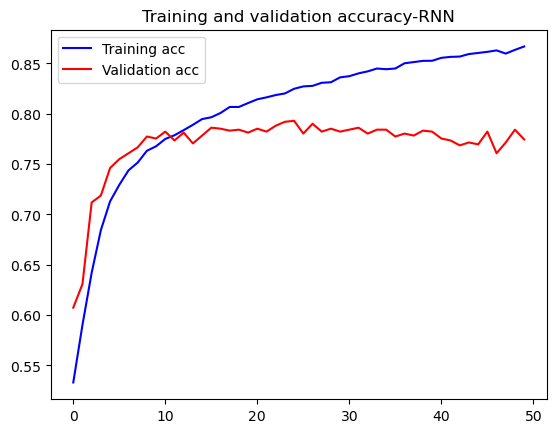

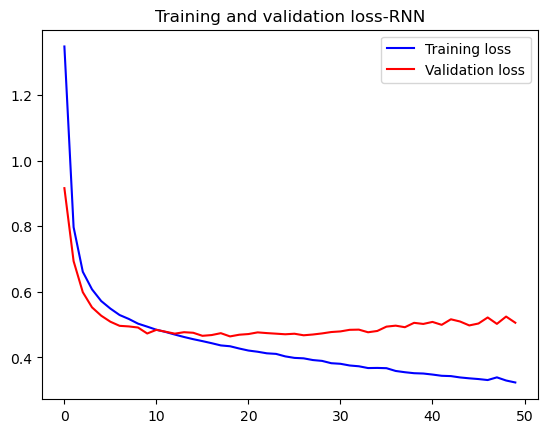

In [112]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-RNN')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-RNN')
plt.legend()

plt.show()

# Loading the last epoch modeln (Optional)

In [43]:
#Now create a simple RNN model and lets see the accuracy
from keras.layers import SimpleRNN
from tensorflow.keras import regularizers

vocabulary_size=202318
embedding_size=100
max_words=28

#Loading the last epoch model
modelRNN=Sequential()
modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(SimpleRNN(150,activation = "tanh"))
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())
modelRNN.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
modelRNN.load_weights("tweet_ananlysis_modle_RNN_weights")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 100)           20231800  
                                                                 
 simple_rnn (SimpleRNN)      (None, 150)               37650     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 20269601 (77.32 MB)
Trainable params: 20269601 (77.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# LSTM 

In [116]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [117]:
embedding_size=100
modelLSTM=Sequential()
modelLSTM.add(Embedding(vocabulary_size,embedding_size,weights = [embedding_matrix],input_length=max_words)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelLSTM.add(Dropout(0.70))
modelLSTM.add(LSTM(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01)))
modelLSTM.add(Dropout(0.15))
modelLSTM.add(Dense(1, activation='sigmoid'))
print(modelLSTM.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 28, 100)           20231800  
                                                                 
 dropout_4 (Dropout)         (None, 28, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150)               150600    
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 151       
                                                                 
Total params: 20382551 (77.75 MB)
Trainable params: 20382551 (77.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [118]:
modelLSTM.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [119]:
batch_size = 1024
num_epochs = 50
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listLSTM = [#early1
                keras.callbacks.ModelCheckpoint(filepath="tweet_ananlysis_model_LSTM_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [120]:
LSTMhistory = modelLSTM.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs,
             callbacks=callback_listLSTM)
modelLSTM.save_weights("tweet_ananlysis_modle_LSTM_weights")

Epoch 1/50
88/88 [==============================] - 133s 1s/step - loss: 1.2019 - accuracy: 0.5745 - val_loss: 0.6872 - val_accuracy: 0.6504
Epoch 2/50
88/88 [==============================] - 123s 1s/step - loss: 0.6474 - accuracy: 0.6504 - val_loss: 0.5839 - val_accuracy: 0.7119
Epoch 3/50
88/88 [==============================] - 126s 1s/step - loss: 0.5880 - accuracy: 0.6986 - val_loss: 0.5492 - val_accuracy: 0.7383
Epoch 4/50
88/88 [==============================] - 132s 2s/step - loss: 0.5556 - accuracy: 0.7228 - val_loss: 0.5188 - val_accuracy: 0.7461
Epoch 5/50
88/88 [==============================] - 131s 1s/step - loss: 0.5339 - accuracy: 0.7402 - val_loss: 0.5051 - val_accuracy: 0.7588
Epoch 6/50
88/88 [==============================] - 127s 1s/step - loss: 0.5157 - accuracy: 0.7522 - val_loss: 0.4917 - val_accuracy: 0.7715
Epoch 7/50
88/88 [==============================] - 127s 1s/step - loss: 0.5037 - accuracy: 0.7594 - val_loss: 0.4849 - val_accuracy: 0.7744
Epoch 8/50
88

In [ ]:
import matplotlib.pyplot as plt
acc = modelLSTM.history.history['accuracy']
val_acc = modelLSTM.history.history['val_accuracy']
loss = modelLSTM.history.history['loss']
val_loss = modelLSTM.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-LSTM')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-LSTM')
plt.legend()

plt.show()

# Loading the last epoch modeln (Optional)

In [44]:
#Now create a simple RNN model and lets see the accuracy
from keras.layers import LSTM
from tensorflow.keras import regularizers

vocabulary_size=202318
embedding_size=100
max_words=28

#Loading the last epoch model
modelLSTM=Sequential()
modelLSTM.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelLSTM.add(LSTM(150,activation = "tanh"))
modelLSTM.add(Dense(1, activation='sigmoid'))
print(modelLSTM.summary())
modelLSTM.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
modelLSTM.load_weights("tweet_ananlysis_modle_LSTM_weights")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 28, 100)           20231800  
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 20382551 (77.75 MB)
Trainable params: 20382551 (77.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Confusion matrix and classification_report using the RNN

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
y_predict = modelRNN.predict(X_test)
cf_matrix=confusion_matrix(y_test, y_predict.round())

317/317 [==============================] - 3s 9ms/step


In [47]:
print(classification_report(y_test, y_predict.round()))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57      4986
           1       0.59      0.61      0.60      5130

    accuracy                           0.59     10116
   macro avg       0.59      0.59      0.59     10116
weighted avg       0.59      0.59      0.59     10116



<AxesSubplot:>

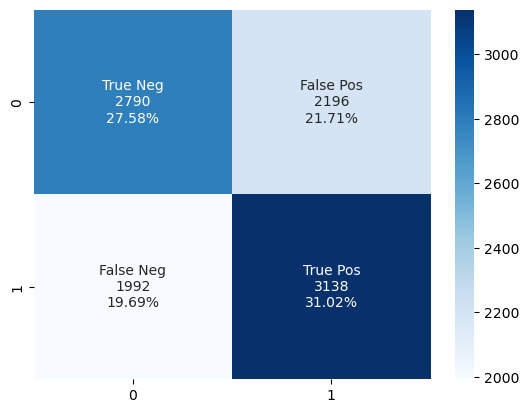

In [48]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Confusion matrix and classification_report using the LSTM

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
y_predict = modelLSTM.predict(X_test)
cf_matrix=confusion_matrix(y_test, y_predict.round())

317/317 [==============================] - 6s 20ms/step


In [81]:
print(classification_report(y_test, y_predict.round()))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58      4986
           1       0.59      0.58      0.58      5130

    accuracy                           0.58     10116
   macro avg       0.58      0.58      0.58     10116
weighted avg       0.58      0.58      0.58     10116



<AxesSubplot:>

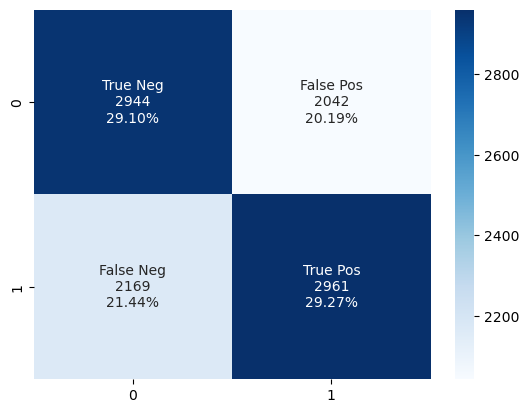

In [82]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Custom Tweet For Extra Test RNN

In [68]:
test_data=['today is a sad day','he was happy today','not a good job']

In [69]:
from keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer(lower=False)
# x_test  = np.array( tokenizer.texts_to_sequences(test_data))
x_test  = tokenizer.texts_to_sequences(test_data)
x_test = pad_sequences(x_test, maxlen=28)
x_test

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
         61,   5],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          4, 276]])

In [70]:
for i in range(0,len(test_data)):
    print('Test sentence:-',test_data[i])

    res=modelRNN.predict(x_test)
    if res[i]>0.3:
        print('Sentiment type:Positive',res[i])
    else:
        print('Sentiment type:Negative',res[i])
    print('==================================================\n')

Test sentence:- today is a sad day
1/1 [==============================] - 0s 23ms/step
Sentiment type:Negative [0.00728914]

Test sentence:- he was happy today
1/1 [==============================] - 0s 25ms/step
Sentiment type:Positive [0.3676902]

Test sentence:- not a good job
1/1 [==============================] - 0s 56ms/step
Sentiment type:Positive [0.32828277]



# # Custom Tweet For Extra Test LSTM

In [71]:
import pandas as pd

test_data=['today is a sad day','he was happy today','not a good job']
# test_data=pd.DataFrame(test_data)
test_data

['today is a sad day', 'he was happy today', 'not a good job']

In [72]:
from keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer(lower=False)
# x_test  = np.array( tokenizer.texts_to_sequences(test_data))
x_test  = tokenizer.texts_to_sequences(test_data)
x_test = pad_sequences(x_test, maxlen=28)
x_test

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
         61,   5],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          4, 276]])

In [73]:
for i in range(0,len(test_data)):
    print('Test sentence:-',test_data[i])

    res=modelLSTM.predict(x_test)
    if res[i]>0.3:
        print('Sentiment type:Positive',res[i])
    else:
        print('Sentiment type:Negative',res[i])
    print('==================================================\n')

Test sentence:- today is a sad day
1/1 [==============================] - 0s 36ms/step
Sentiment type:Negative [0.01751922]

Test sentence:- he was happy today
1/1 [==============================] - 0s 31ms/step
Sentiment type:Positive [0.31708783]

Test sentence:- not a good job
1/1 [==============================] - 0s 33ms/step
Sentiment type:Negative [0.222843]



## Extra Work

## Building a function to convert words into vector

In [ ]:
#pre- processing custom tweets ()
def preprocess_tweets(tweet):
    #fo = open('/content/stopwords.txt', "r+")
    #stop_words = list(fo.read().split(','))
    #translation={39:None}
    processed_tweet = tweet
    processed_tweet=re.sub('\d+', '',tweet)
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",processed_tweet).split())
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in str(STOPWORDS))

    return(processed_tweet)

In [ ]:
def tweet_to_vector(text):
    print('Original tweet:-',text)
    text=preprocess_tweets(text)
    print('Processed tweet:- '+text)
    text=text.split(' ')
    tokenizer = Tokenizer(lower=False)
    tokenizer.fit_on_texts(text)
    text_vec = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    print(word_index)
    print('==================================================')
    embeddings_index = {}
    f = open('/content/glove.6B.100d.txt')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        if word in word_index.keys():
            embeddings_index[word] = coefs
    for notw in word_index.keys():
        if notw not in embeddings_index.keys():
            embeddings_index[notw] = 'unknown'
    f.close()
    print('Vector for each word in processed tweet')
    print(embeddings_index)

In [ ]:
custom_tweet='@meera2353 Hello this is very bad that company fired them, not a good day #job #sad #employeeprotest'
custom_tweets= tweet_to_vector(custom_tweet)